# Final Project
## Neural network

In [1]:
# Import

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Neural Network
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [3]:
dataset_one_month = pd.read_csv(
    'April_1_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_three_months = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_six_months = pd.read_csv(
    'April_to_Oct_6_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

In [4]:
dataset_one_month = dataset_one_month.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_one_month = dataset_one_month.dropna(axis=0, how='any')
dataset_one_month

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,36,22,40,14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.075579,51.5213
2016-04-01,18,31,41,-13.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.083911,51.5200
2016-04-01,39,39,42,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.093904,51.5310
2016-04-01,20,37,43,-17.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.157184,51.5203
2016-04-01,24,38,44,-14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.144165,51.5107
...,...,...,...,...,...,...,...,...,...,...,...
2016-04-30,52,4,790,48.0,9.083333,7.958333,55.979167,12.270833,30.0,-0.004810,51.5418
2016-04-30,17,33,792,-16.0,9.083333,7.958333,55.979167,12.270833,30.0,-0.104541,51.5055
2016-04-30,14,30,793,-16.0,9.083333,7.958333,55.979167,12.270833,30.0,-0.119559,51.5283


In [5]:
dataset_three_months = dataset_three_months.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_three_months = dataset_three_months.dropna(axis=0, how='any')
dataset_three_months

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,36,22,40,14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.075579,51.5213
2016-04-01,18,31,41,-13.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.083911,51.5200
2016-04-01,39,39,42,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.093904,51.5310
2016-04-01,20,37,43,-17.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.157184,51.5203
2016-04-01,24,38,44,-14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.144165,51.5107
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-01,38,10,720,28.0,16.770833,16.770833,73.291667,22.270833,1.0,-0.205279,51.4872
2016-07-01,20,63,721,-43.0,16.770833,16.770833,73.291667,22.270833,1.0,-0.026263,51.5360
2016-07-01,23,17,722,6.0,16.770833,16.770833,73.291667,22.270833,1.0,-0.058632,51.5246


In [6]:
dataset_six_months = dataset_six_months.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_six_months = dataset_six_months.dropna(axis=0, how='any')
dataset_six_months

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,36,22,40,14.0,8.520833,7.895833,66.50,11.166667,1.0,-0.075579,51.521300
2016-04-01,18,31,41,-13.0,8.520833,7.895833,66.50,11.166667,1.0,-0.083911,51.520000
2016-04-01,39,39,42,0.0,8.520833,7.895833,66.50,11.166667,1.0,-0.093904,51.531000
2016-04-01,20,37,43,-17.0,8.520833,7.895833,66.50,11.166667,1.0,-0.157184,51.520300
2016-04-01,24,38,44,-14.0,8.520833,7.895833,66.50,11.166667,1.0,-0.144165,51.510700
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-30,2,53,785,-51.0,10.680556,10.638889,90.25,4.881944,30.0,-0.010511,51.540900
2016-10-30,1,37,789,-36.0,10.680556,10.638889,90.25,4.881944,30.0,-0.011890,51.538700
2016-10-30,1,35,792,-34.0,10.680556,10.638889,90.25,4.881944,30.0,-0.104541,51.505500


## Plotting

In [7]:
def plot_graph(y_train, y_test_org, y_pred, i):
    ## Print heading
    plt.title( 'Station Id: %d' % (i))

    plt.plot(np.arange(0, len(y_train)), y_train, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_org, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

## Error calculation

In [8]:
def get_MAE(y_test_org, y_pred):
    MAE = metrics.mean_absolute_error(y_test_org, y_pred)
    return MAE

In [9]:
def get_MSE(y_test_org, y_pred):
    MSE = metrics.mean_squared_error(y_test_org, y_pred)
    return MSE

In [10]:
def print_error_calculation(y_test_org, y_pred):
    print('MAE:', get_MAE(y_test_org, y_pred))
    print('MSE:', get_MSE(y_test_org, y_pred))

### Datasets for each stations

In [11]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj_1_m = dataset_one_month.groupby('Station Id')
obj_3_m = dataset_three_months.groupby('Station Id')
obj_6_m = dataset_six_months.groupby('Station Id')

In [12]:
# add datasets to list

df_1_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_1_m.append(obj_1_m.get_group(i))

In [13]:
# add datasets to list

df_3_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_3_m.append(obj_3_m.get_group(i))

In [14]:
# add datasets to list

df_6_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_6_m.append(obj_6_m.get_group(i))

## Neural network

2022-04-22 01:34:27.178138: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.9536 - accuracy: 0.0139
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9524 - accuracy: 0.0139
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9517 - accuracy: 0.0139
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9506 - accuracy: 0.0139
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9498 - accuracy: 0.0139
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9491 - accuracy: 0.0139
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 0.9479 - accuracy: 0.0139
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9472 - accuracy: 0.0139
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9460 - accuracy: 0.0139
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9456 - accuracy: 0.0139
Epoch 11/50
5/5 [======================

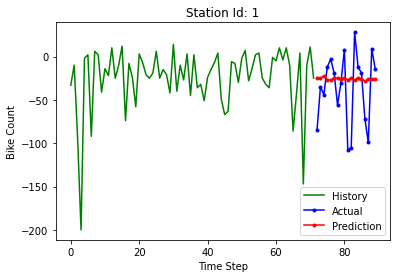

MAE: 33.49225436316596
MSE: 1772.80478239568
Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 1.8515 - accuracy: 0.0278
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 1.8479 - accuracy: 0.0278
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 1.8456 - accuracy: 0.0278
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 1.8433 - accuracy: 0.0278
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 1.8399 - accuracy: 0.0278
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 1.8361 - accuracy: 0.0278
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 1.8340 - accuracy: 0.0278
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 1.8305 - accuracy: 0.0278
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 1.8285 - accuracy: 0.0278
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 1.8240 - accuracy: 0

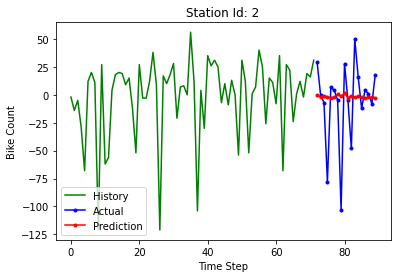

MAE: 23.836398283640545
MSE: 1321.809289722166
Epoch 1/50
5/5 [==============================] - 1s 6ms/step - loss: 0.5012 - accuracy: 0.0286
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 0.5005 - accuracy: 0.0286
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4997 - accuracy: 0.0286
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.4991 - accuracy: 0.0286
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 0.4984 - accuracy: 0.0286
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4981 - accuracy: 0.0286
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.4971 - accuracy: 0.0286
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4965 - accuracy: 0.0286
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.4957 - accuracy: 0.0286
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy:

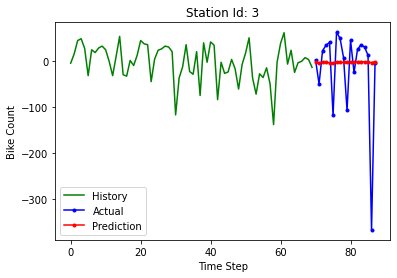

MAE: 58.054569509294296
MSE: 9671.747277101686
Epoch 1/50
5/5 [==============================] - 1s 5ms/step - loss: 3.6750 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 3.6708 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 3.6661 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 3.6610 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 3.6566 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 3.6517 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 3.6463 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 3.6426 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 3.6358 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0

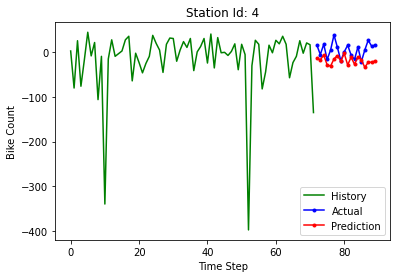

MAE: 24.197906308703953
MSE: 853.8125173921029
Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 1.1246 - accuracy: 0.0278
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1223 - accuracy: 0.0278
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 1.1207 - accuracy: 0.0278
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 1.1188 - accuracy: 0.0278
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 1.1173 - accuracy: 0.0278
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 1.1149 - accuracy: 0.0278
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 1.1134 - accuracy: 0.0278
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 1.1115 - accuracy: 0.0278
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 1.1098 - accuracy: 0.0278
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 1.1073 - accuracy:

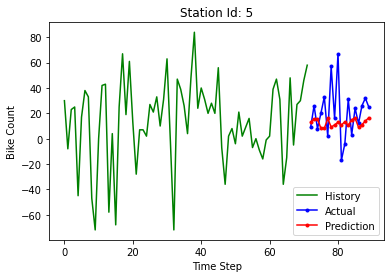

MAE: 17.22703531053331
MSE: 484.42056425395884
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.0139
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.0139
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.0139
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.0139
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6512 - accuracy: 0.0139
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.6501 - accuracy: 0.0139
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6493 - accuracy: 0.0139
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6480 - accuracy: 0.0139
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 0.6468 - accuracy: 0.0139
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6460 - accuracy

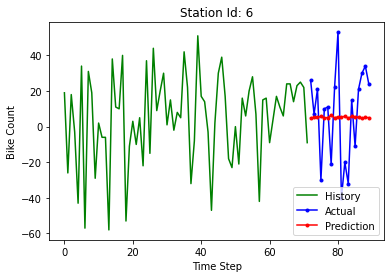

MAE: 22.194480684068466
MSE: 657.6299481673371
Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.9263 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9256 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.9239 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9230 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9217 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9204 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9190 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9189 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 11ms/step - loss: 0.9168 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0

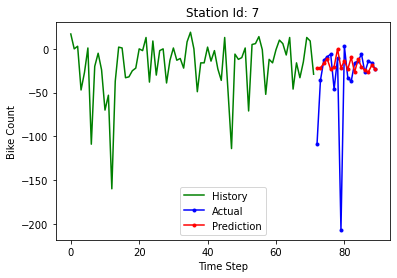

MAE: 24.71008602778117
MSE: 2484.16720553453
Epoch 1/50
5/5 [==============================] - 1s 4ms/step - loss: 0.9961 - accuracy: 0.0563
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9941 - accuracy: 0.0563
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.9910 - accuracy: 0.0563
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9887 - accuracy: 0.0563
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.9860 - accuracy: 0.0563
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 0.9833 - accuracy: 0.0563
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.9805 - accuracy: 0.0563
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9776 - accuracy: 0.0563
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9745 - accuracy: 0.0563
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9707 - accuracy: 

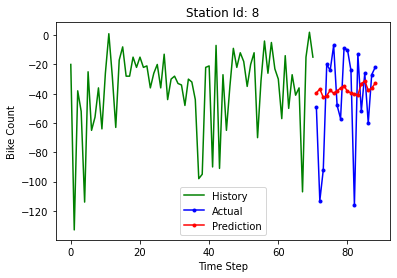

MAE: 26.308196385701496
MSE: 1106.5575888280703
Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 1.0312 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 1.0300 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 1.0293 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 1.0286 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 1.0275 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 1.0267 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 1.0261 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 1.0251 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 1.0243 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0

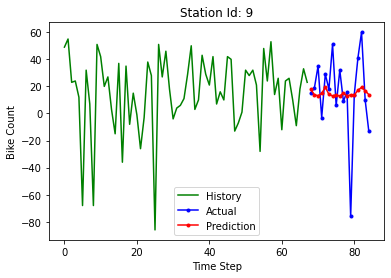

MAE: 19.059109575608197
MSE: 818.9311996929183
Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.9885 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9864 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.9840 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9823 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 0.9808 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9784 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9774 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9748 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.9727 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s

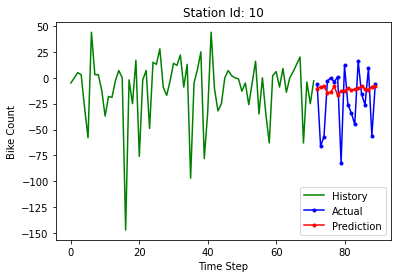

MAE: 24.648501449161106
MSE: 964.7127514707499

Error Calculation
Average MAE: 27.372853789765855
Average MSE: 2013.65931245592


In [15]:
totalMAE = 0
totalMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(0, no_station):
    
    X = df_3_m[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_3_m[i].values[:, 3:4] # Predict
 
    ### Sandardization of data ###
    #PredictorScaler = StandardScaler()
    #TargetVarScaler = StandardScaler()
    
    PredictorScaler = RobustScaler()
    TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()

    # Generating the standardized values of X and y
    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)
    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    neural_network_model.fit(X_train, y_train, batch_size = 15,  epochs = 50)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    plot_graph(y_train, y_test_org, y_pred, i+1)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

## advanced

In [16]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData = pd.DataFrame(columns=['trial', 'batch_size', 'epochs', 'Accuracy'])
    
    # initializing the trials
    trial = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            trial += 1
            test_model = keras.Sequential([
            layers.Dense(units = 5, input_dim = X_train.shape[1], kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(units =5 , kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(1, kernel_initializer = 'normal'),
            ])

            test_model.compile(loss='mean_squared_error', optimizer='adam')
            test_model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            MSE = metrics.mean_squared_error(y_test, test_model.predict(X_test))
            # printing the results of the current iteration
            # print('trial', 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', MSE)
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(data = [[trial, batch_size_trial, epochs_trial, MSE]],
                                                                      columns = ['trial', 'batch_size', 'epochs', 'Accuracy'] ))
    return SearchResultsData

In [17]:
result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
result_df

,trial,batch_size,epochs,Accuracy
0,1,5,5,1.067419
0,2,5,10,0.954856
0,3,5,50,31.311955
0,4,5,100,90.921520
0,5,10,5,1.081839
0,6,10,10,1.051347
0,7,10,50,0.893516
0,8,10,100,61.077429
0,9,15,5,1.094421
0,10,15,10,1.071005


<AxesSubplot:xlabel='batch_size'>

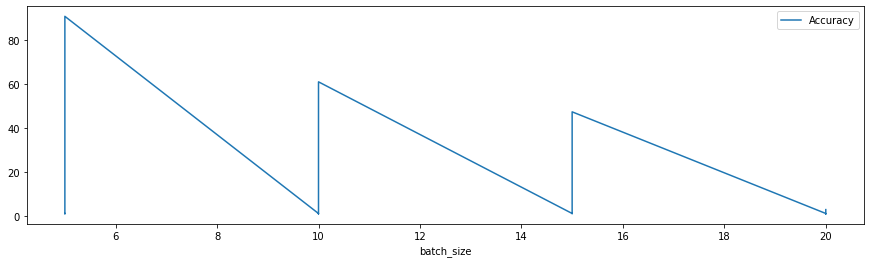

In [18]:
%matplotlib inline
result_df.plot(x='batch_size', y='Accuracy', figsize=(15,4), kind='line')

# parameters 
# e.g. 15-50
# 15 - batch size, 50 - epochs

In [19]:
return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
print(return_df['batch_size'][0], return_df['epochs'][0])

5 100


  trial batch_size epochs  Accuracy
0    12         15    100  1.183835
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9493 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9484 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9481 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9479 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9475 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9472 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9469 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.9467 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.9461 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [=

5/5 [==============================] - 0s 4ms/step - loss: 0.8819 - accuracy: 0.0000e+00
Epoch 81/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8817 - accuracy: 0.0000e+00
Epoch 82/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8820 - accuracy: 0.0000e+00
Epoch 83/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8811 - accuracy: 0.0000e+00
Epoch 84/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8810 - accuracy: 0.0000e+00
Epoch 85/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8806 - accuracy: 0.0000e+00
Epoch 86/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8801 - accuracy: 0.0000e+00
Epoch 87/100
5/5 [==============================] - 0s 5ms/step - loss: 0.8801 - accuracy: 0.0000e+00
Epoch 88/100
5/5 [==============================] - 0s 5ms/step - loss: 0.8797 - accuracy: 0.0000e+00
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8790 - accuracy: 0.00

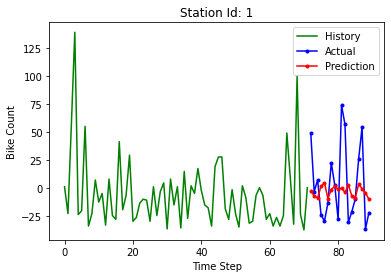

MAE: 27.346403198067897
MSE: 1180.496112634824
  trial batch_size epochs  Accuracy
0    12         15    100   0.82696
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0409 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0407 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0409 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0406 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0407 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0405 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0405 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0404 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 1.

5/5 [==============================] - 0s 6ms/step - loss: 0.9643 - accuracy: 0.0000e+00
Epoch 81/100
5/5 [==============================] - 0s 7ms/step - loss: 0.9636 - accuracy: 0.0000e+00
Epoch 82/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9635 - accuracy: 0.0000e+00
Epoch 83/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9624 - accuracy: 0.0000e+00
Epoch 84/100
5/5 [==============================] - 0s 6ms/step - loss: 0.9625 - accuracy: 0.0000e+00
Epoch 85/100
5/5 [==============================] - 0s 9ms/step - loss: 0.9624 - accuracy: 0.0000e+00
Epoch 86/100
5/5 [==============================] - 0s 6ms/step - loss: 0.9619 - accuracy: 0.0000e+00
Epoch 87/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9612 - accuracy: 0.0000e+00
Epoch 88/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9614 - accuracy: 0.0000e+00
Epoch 89/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9606 - accuracy: 0.00

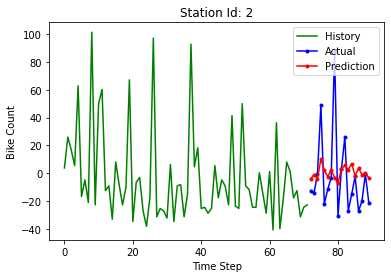

MAE: 19.86695841332208
MSE: 814.0731297481036
  trial batch_size epochs  Accuracy
0    13         20      5  3.273885
Epoch 1/5
4/4 [==============================] - 1s 2ms/step - loss: 0.4176 - accuracy: 0.0143
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.0143
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.0143
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.0143
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.0143


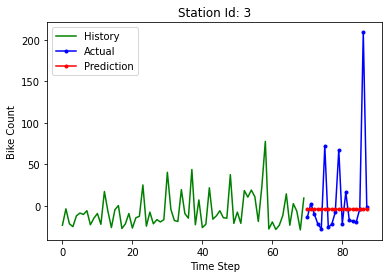

MAE: 30.587564060054756
MSE: 3303.1589518670216
  trial batch_size epochs  Accuracy
0     5         10      5  0.131648
Epoch 1/5
8/8 [==============================] - 1s 3ms/step - loss: 1.2175 - accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 0s 2ms/step - loss: 1.2172 - accuracy: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 0s 2ms/step - loss: 1.2169 - accuracy: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 0s 2ms/step - loss: 1.2170 - accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 0s 3ms/step - loss: 1.2160 - accuracy: 0.0000e+00


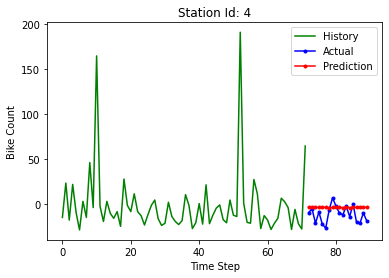

MAE: 9.444139178002622
MSE: 134.12653371167906
  trial batch_size epochs  Accuracy
0    13         20      5  0.512373
Epoch 1/5
4/4 [==============================] - 1s 3ms/step - loss: 1.1232 - accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 0s 3ms/step - loss: 1.1225 - accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 0s 3ms/step - loss: 1.1223 - accuracy: 0.0000e+00
Epoch 4/5
4/4 [==============================] - 0s 3ms/step - loss: 1.1218 - accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 1.1216 - accuracy: 0.0000e+00


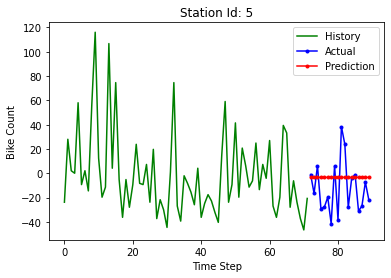

MAE: 19.113012735567995
MSE: 517.0580140341045
  trial batch_size epochs  Accuracy
0     3          5     50  1.255397
Epoch 1/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9353 - accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9348 - accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9341 - accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9342 - accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9338 - accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9336 - accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.0000e+00
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9335 - accuracy: 0.0000e+00
Epoch 9/50
15/15 [==============================] - 0s 1ms/step -

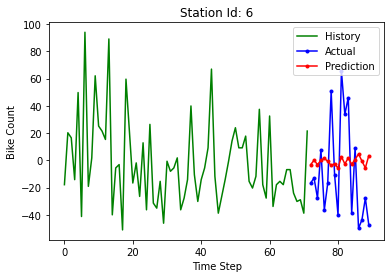

MAE: 31.599517368022955
MSE: 1304.5856658614944
  trial batch_size epochs  Accuracy
0     3          5     50  1.899927
Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 0.7680 - accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7675 - accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7654 - accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7642 - accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7627 - accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7605 - accuracy: 0.0000e+00
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.0000e+00
Epoch 9/50
15/15 [==============================] - 0s 2ms/step 

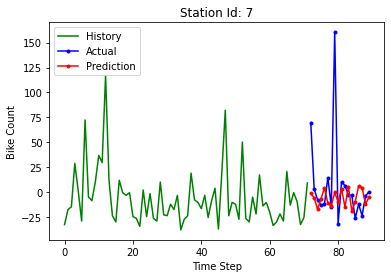

MAE: 24.98050747116389
MSE: 1924.7170328669235
  trial batch_size epochs  Accuracy
0    11         15     50  1.415945
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8918 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8915 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8911 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8909 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8905 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8902 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.8893 - ac

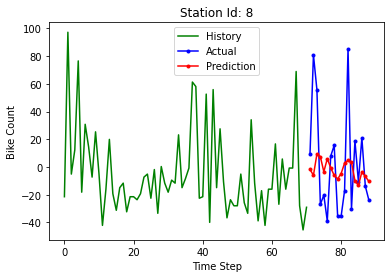

MAE: 29.916416911073256
MSE: 1398.2945982932754
  trial batch_size epochs  Accuracy
0     8         10    100  1.186488
Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9274 - accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9273 - accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9272 - accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9271 - accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9271 - accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9273 - accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9270 - accuracy: 0.0000e+00
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9268 - accuracy: 0.0000e+00
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0

7/7 [==============================] - 0s 3ms/step - loss: 0.8575 - accuracy: 0.0000e+00
Epoch 81/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8565 - accuracy: 0.0000e+00
Epoch 82/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8559 - accuracy: 0.0000e+00
Epoch 83/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8548 - accuracy: 0.0000e+00
Epoch 84/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8564 - accuracy: 0.0000e+00
Epoch 85/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8535 - accuracy: 0.0000e+00
Epoch 86/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8539 - accuracy: 0.0000e+00
Epoch 87/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8534 - accuracy: 0.0000e+00
Epoch 88/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8533 - accuracy: 0.0000e+00
Epoch 89/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8521 - accuracy: 0.00

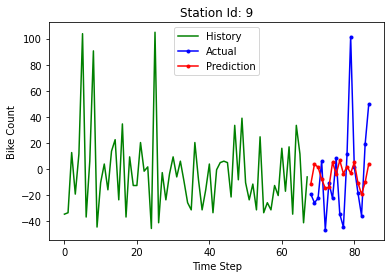

MAE: 26.416897111849618
MSE: 1255.6593696399636
  trial batch_size epochs  Accuracy
0     9         15      5  0.982778
Epoch 1/5
5/5 [==============================] - 1s 2ms/step - loss: 1.0052 - accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - 0s 2ms/step - loss: 1.0045 - accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - 0s 2ms/step - loss: 1.0044 - accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - 0s 2ms/step - loss: 1.0037 - accuracy: 0.0000e+00
Epoch 5/5
5/5 [==============================] - 0s 2ms/step - loss: 1.0035 - accuracy: 0.0000e+00


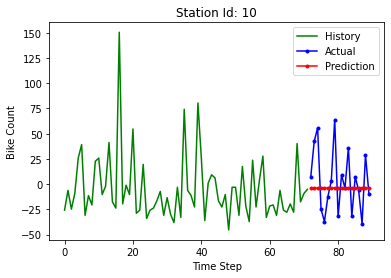

MAE: 25.039725291995918
MSE: 993.6758386521144

Error Calculation
Average MAE: 24.431114173912096
Average MSE: 1282.5845247309503


In [20]:
totalMAE = 0
totalMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(0, no_station):
    
    X = df_3_m[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_3_m[i].values[:, 3:4] # Predict
 
    ### Sandardization of data ###
    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()
    
    #PredictorScaler = RobustScaler()
    #TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    
    # find best parameters
    result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
    return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].min()]
    print(return_df)
    best_batch_size = int(return_df['batch_size'][0])
    best_epochs = int(return_df['epochs'][0])
    
    neural_network_model.fit(X_train, y_train, batch_size = best_batch_size,  epochs = best_epochs)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    plot_graph(y_train, y_test_org, y_pred, i+1)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/